Abuzyar Tazetdinov

a.tazetdinov@innopolis.university

Group -- SD-02

# Task 1

## Reading dataset and preparing data

In [1]:
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("task1_dataset.csv").to_numpy()
full_data = pd.read_csv("task1_dataset_full.csv").to_numpy()


def add_indexes(data: np.array) -> None:
    """Add surrogate indexes as first column for provided array"""
    data[:, 0] = list(range(len(data)))


def convert_datetime(
        data: np.array,
        column: int,
        format_: str = "%Y-%m-%d %H:%M:%S",
) -> None:
    """
    Сonvert of datetime column in-place
    to native objects from strings 
    with provided format string.
    """
    for i in range(len(data[:, column])):
        data[:, column][i] = datetime.strptime(data[:, column][i], format_)


def split_clean_dirty_data(data: np.array) -> (np.array, np.array):
    """Split non-full dataset into clean and dirty parts"""
    dirty_data = []
    clean_data = []

    for i in range(data.shape[0]):
        if np.isnan(data[i, 2]) or np.isnan(data[i, 3]) or np.isnan(data[i, 4]):
            dirty_data.append(data[i])
        else:
            clean_data.append(data[i])

    return np.array(clean_data), np.array(dirty_data)


def get_truth_data_for_dirty_part(
        full_data: np.array,
        dirty_data: np.array,
) -> np.array:
    """Extract rows from full data corresponding to rows in dirty part"""
    truth_data = []
    for i in range(dirty_data.shape[0]):
        truth_data.append(full_data[dirty_data[i, 0]])
    return np.array(truth_data)


convert_datetime(data, 1)
data = np.array(sorted(data, key=lambda i: (i[1])))
add_indexes(data)

convert_datetime(full_data, 1)
full_data = np.array(sorted(full_data, key=lambda i: (i[1])))
add_indexes(full_data)

# print("data:", data)
# print("full_data:", full_data)

clean_data, dirty_data = split_clean_dirty_data(data)
truth_data = get_truth_data_for_dirty_part(full_data, dirty_data)

## Visualising clean data

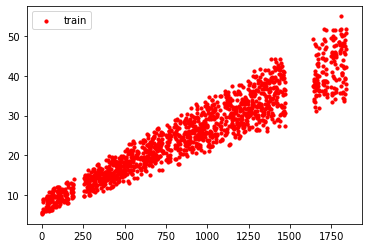

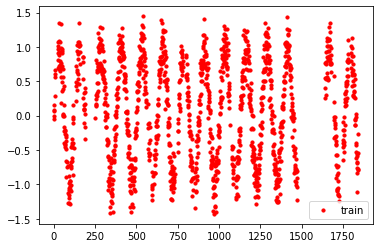

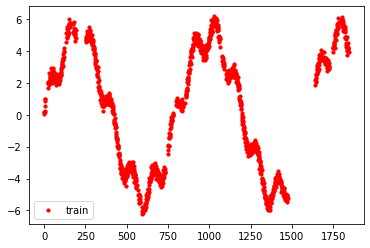

In [2]:
plt.scatter(clean_data[:, 0], clean_data[:, 2], color="red", s=10, label="train")
plt.legend()
plt.show()

plt.scatter(clean_data[:, 0], clean_data[:, 3], color="red", s=10, label="train")
plt.legend()
plt.show()

plt.scatter(clean_data[:, 0], clean_data[:, 4], color="red", s=10, label="train")
plt.legend()
plt.show()

## Preparations to training models

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x_train = clean_data[:, 0]
x_test = dirty_data[:, 0]

x_train = np.expand_dims(x_train, axis=1)
x_test = np.expand_dims(x_test, axis=1)


def test_regression(feature_column: int) -> None:
    mses = []
    degrees = list(range(1, 11))

    y_train = clean_data[:, feature_column]
    y_test = truth_data[:, feature_column]

    y_train = np.expand_dims(y_train, axis=1)
    y_test = np.expand_dims(y_test, axis=1)

    # print(f"x_train (shape = {x_train.shape})")
    # print(f"x_test: (shape = {x_test.shape})")
    # print(f"y_train: (shape = {y_train.shape})")
    # print(f"y_test: (shape = {y_test.shape})")

    for degree in degrees:
        poly_reg = PolynomialFeatures(degree=degree)
        x_poly = poly_reg.fit_transform(x_train)
        pol_reg = LinearRegression()
        pol_reg.fit(x_poly, y_train)
        y_pred = pol_reg.predict(poly_reg.fit_transform(x_test))
        mse = mean_squared_error(y_test, y_pred)
        mses.append(mse)

        print(f"Degree is {degree}")
        plt.scatter(x_train, y_train, color="red", s=10, label="train")
        plt.scatter(x_test, y_pred, color="blue", s=10, label="predicted")
        plt.scatter(x_test, y_test, color="green", s=10, label="test")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.show()

    for i in range(len(degrees)):
        print(f"Degree {degrees[i]} has MSE = {mses[i]}")

    print(f"Best degree is {degrees[mses.index(min(mses))]}")

    plt.plot(degrees, mses, label="MSE")
    plt.xlabel("Degree")
    plt.ylabel("MSE")
    plt.legend()
    plt.show()

## Feature 1

Degree is 1


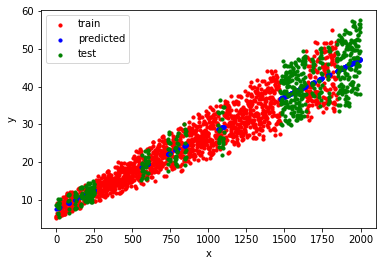

Degree is 2


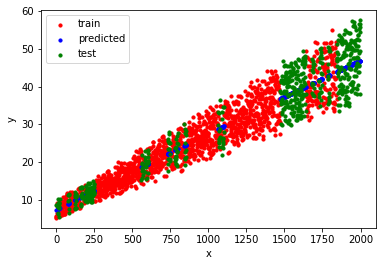

Degree is 3


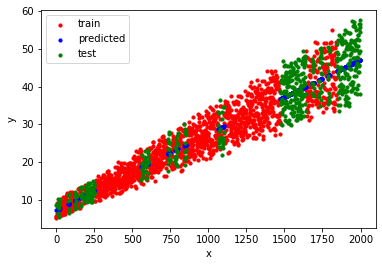

Degree is 4


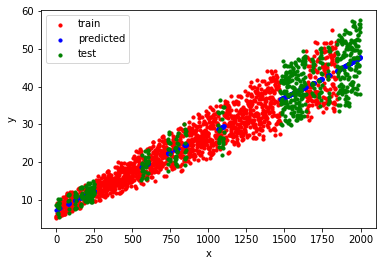

Degree is 5


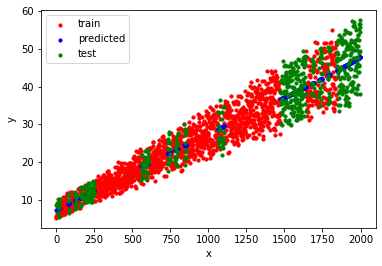

Degree is 6


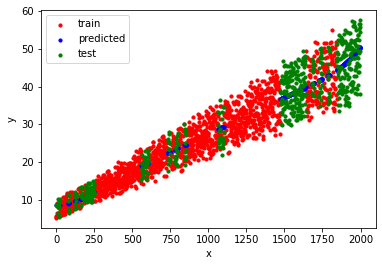

Degree is 7


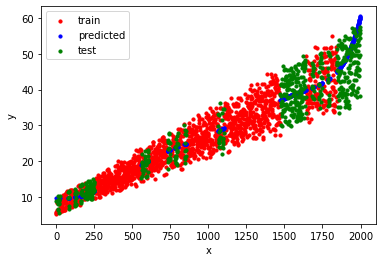

Degree is 8


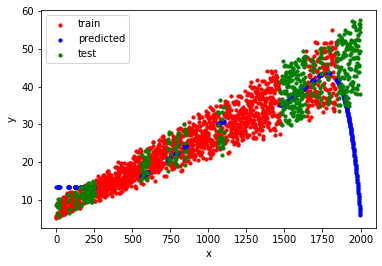

Degree is 9


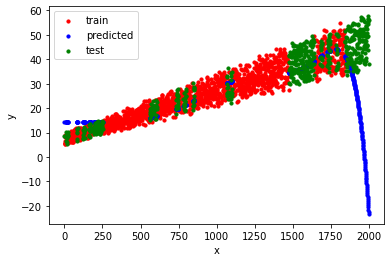

Degree is 10


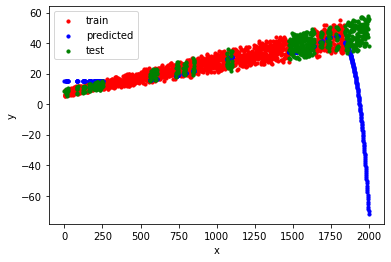

Degree 1 has MSE = 20.514218433179273
Degree 2 has MSE = 20.679440322645053
Degree 3 has MSE = 20.604322454122514
Degree 4 has MSE = 20.501272128726743
Degree 5 has MSE = 20.484691934662496
Degree 6 has MSE = 20.60211092685424
Degree 7 has MSE = 28.88570199210629
Degree 8 has MSE = 139.38597749824817
Degree 9 has MSE = 333.1216139931207
Degree 10 has MSE = 843.097654079043
Best degree is 5


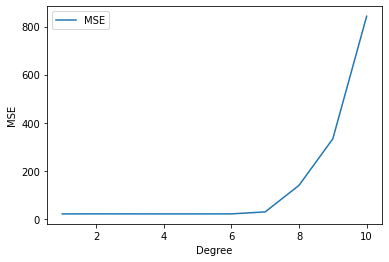

In [4]:
test_regression(2)

Feature 1: First feature has linear nature.
Results show that degree 5 has lowest MSE.
But if we look results more detailed, it can be said that
degrees 1-6 fit data well, because they all have MSE equal ~20.
I think this behaviour can be explained by width of this "window",
inside which points located.

## Feature 2

Degree is 1


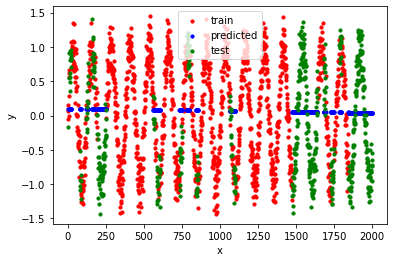

Degree is 2


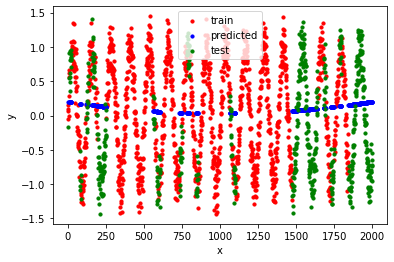

Degree is 3


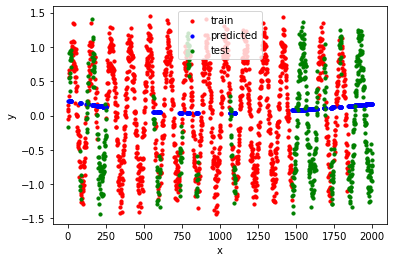

Degree is 4


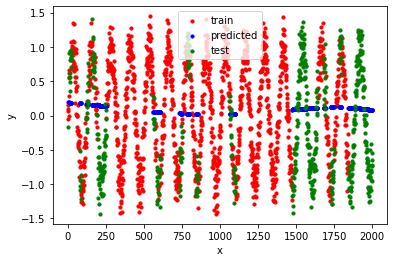

Degree is 5


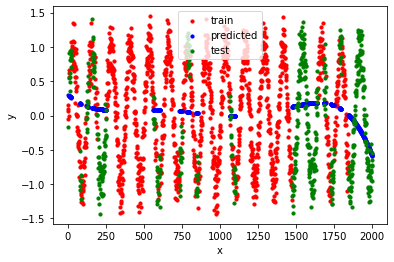

Degree is 6


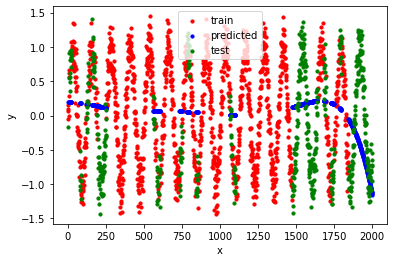

Degree is 7


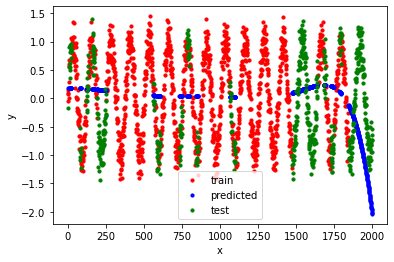

Degree is 8


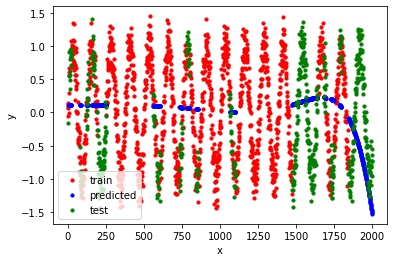

Degree is 9


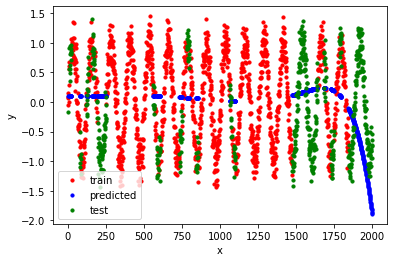

Degree is 10


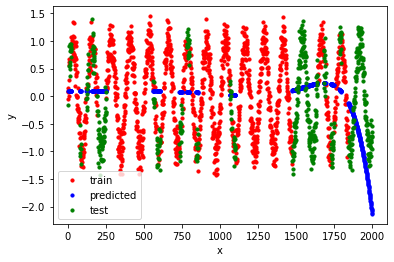

Degree 1 has MSE = 0.6393243768607544
Degree 2 has MSE = 0.6620020642707155
Degree 3 has MSE = 0.6577093980607561
Degree 4 has MSE = 0.6520826408271458
Degree 5 has MSE = 0.6412315937516313
Degree 6 has MSE = 0.6911650781942975
Degree 7 has MSE = 0.8395271423472318
Degree 8 has MSE = 0.7424753311618205
Degree 9 has MSE = 0.8061896909982165
Degree 10 has MSE = 0.8565510288463671
Best degree is 1


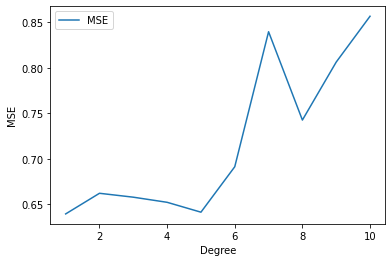

In [5]:
test_regression(3)

Feature 2: I think for this type of data sin or cos functions
can show better results. Degree 1 have lowest MSE, because line
located in some balanced position. Changing frequency of missed data
for some higher or lower part of X-axis
can change better degree, but in this case degree 1 wins.
Anyway degrees 1-6 again have almost equal MSE.

## Feature 3

Degree is 1


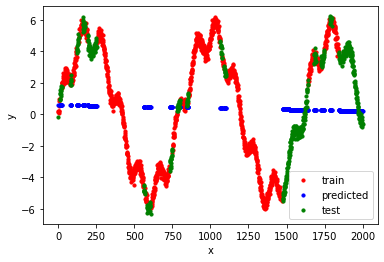

Degree is 2


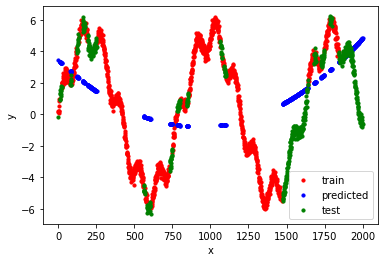

Degree is 3


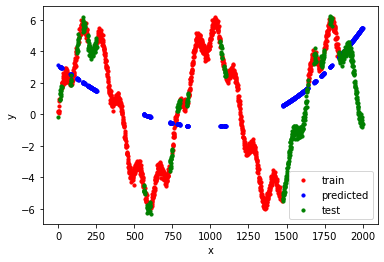

Degree is 4


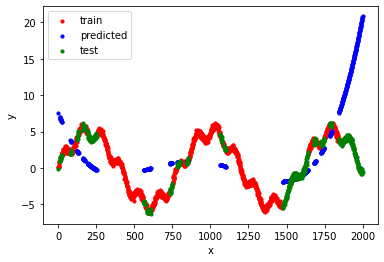

Degree is 5


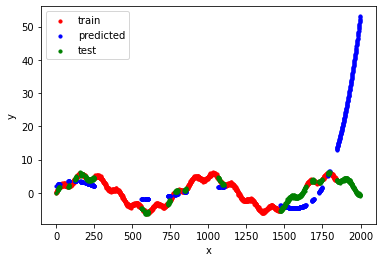

Degree is 6


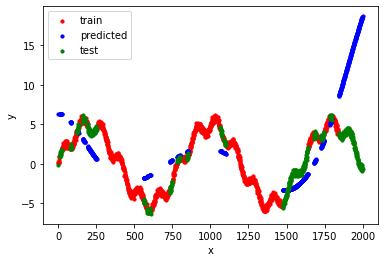

Degree is 7


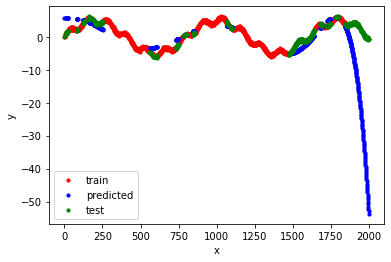

Degree is 8


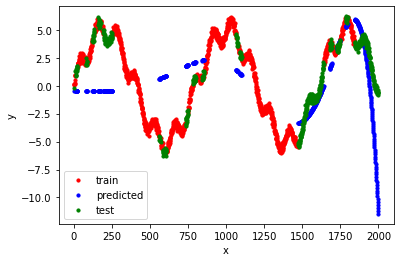

Degree is 9


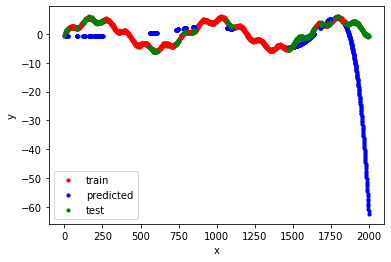

Degree is 10


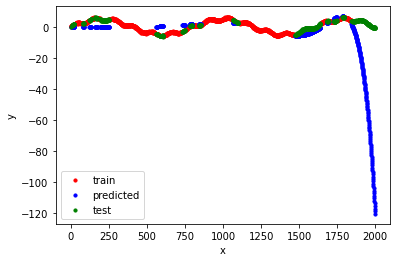

Degree 1 has MSE = 10.600237868172986
Degree 2 has MSE = 8.548827683679075
Degree 3 has MSE = 9.017793825363633
Degree 4 has MSE = 46.58995342898726
Degree 5 has MSE = 260.1424486692353
Degree 6 has MSE = 42.84735287821151
Degree 7 has MSE = 164.55094562025943
Degree 8 has MSE = 11.580414727989837
Degree 9 has MSE = 217.11699863323946
Degree 10 has MSE = 802.0156655744062
Best degree is 2


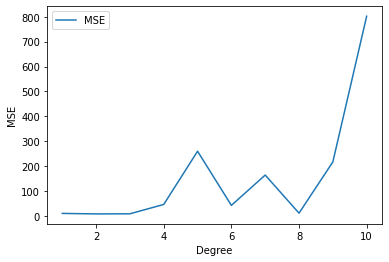

In [6]:
test_regression(4)

Feature 3: Data have some similarity with Feature 2.
I think again we can try some combination of sin and cos functions.
For this feature degree 2 has lowest MSE.
It can be explained by curve of parabola.
Degree 1 have greater MSE, because data less "balanced" comparing
with Feature 2. Parabola better fits this "less balanced" missed data.

# Task 2

## Reading dataset and preparing data

In [7]:
from typing import List
from sklearn.impute import SimpleImputer

dataframe = pd.read_csv("GermanData.csv", header=None)
data = dataframe.to_numpy()


# I've decided to convert categorical data to numerical
# by removing 'A' prefix from categorical index.
# There are no conflicts, because data categories has
# unique categorical index.

def convert_columns(data: np.array, columns: List[int]):
    """
    Converts provided columns in data
    by removing first symbol from string
    and casting remaining string to integer
    """
    for col in columns:
        for i in range(len(data)):
            data[i, col] = int(data[i, col][1:])  # remove A from value of feature


# converting categorical data columns to numerical
convert_columns(data, [0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19])

imp_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
data = imp_mean.fit_transform(data)

## Visualising reduced feature set and values

[]

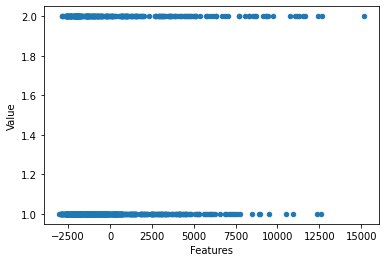

In [8]:
from sklearn.decomposition import PCA

pca = PCA(1)
pca.fit(data[:, :20])
data_1d = pca.transform(data[:, :20])
plt.scatter(data_1d, data[:, 20], s=20)
plt.xlabel("Features")
plt.ylabel("Value")
plt.plot()

## Visualising correlation matrix

          0         1         2         3         4         5         6   \
0   1.000000 -0.072013  0.192191 -0.061804 -0.042705  0.222867  0.106339   
1  -0.072013  1.000000 -0.077186  0.112326  0.624984  0.047661  0.057381   
2   0.192191 -0.077186  1.000000 -0.027260 -0.059905  0.039058  0.138225   
3  -0.061804  0.112326 -0.027260  1.000000  0.193361 -0.019823 -0.033179   
4  -0.042705  0.624984 -0.059905  0.193361  1.000000  0.064630 -0.008367   
5   0.222867  0.047661  0.039058 -0.019823  0.064630  1.000000  0.120950   
6   0.106339  0.057381  0.138225 -0.033179 -0.008367  0.120950  1.000000   
7  -0.005280  0.074749  0.044375 -0.026222 -0.271316  0.021993  0.126161   
8   0.043261  0.014789  0.042171 -0.015018 -0.016091  0.017349  0.111278   
9  -0.127737 -0.024490 -0.040676  0.078943 -0.027832 -0.105069 -0.008116   
10 -0.042234  0.034067  0.063198  0.036959  0.028926  0.091424  0.245081   
11 -0.032260  0.303971 -0.053777  0.083797  0.311599  0.018948  0.087187   
12  0.059751

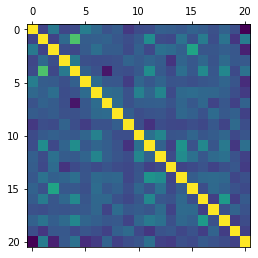

In [9]:
dataframe = pd.DataFrame(data=data)
corr = dataframe.corr()
corr.style.background_gradient(cmap="coolwarm")
plt.matshow(corr)
print(corr)

Features are not highly co-related (values close to 0).
Multicollinearity can lead to overfit and longer training time.
Also, it can make model more complex.

## Training with PCA

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[:, :20], data[:, 20], test_size=0.3, random_state=42,
                                                    shuffle=False)

y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Trying to train with reduced feature set for all 10 degrees
pca = PCA(n_components=10)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
pca_train_accuracies = []
pca_test_accuracies = []

degrees = list(range(1, 11))

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x_train_pca)
    print(f"x_poly: (shape = {x_poly.shape})")

    log_regr = LogisticRegression()
    log_regr.fit(x_poly, y_train)

    y_pred = log_regr.predict(poly.fit_transform(x_test_pca))

    pca_test_accuracies.append(accuracy_score(y_test, y_pred))
    pca_train_accuracies.append(accuracy_score(y_train, log_regr.predict(poly.fit_transform(x_train_pca))))

x_poly: (shape = (700, 11))
x_poly: (shape = (700, 66))


C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also re

x_poly: (shape = (700, 286))
x_poly: (shape = (700, 1001))
x_poly: (shape = (700, 3003))
x_poly: (shape = (700, 8008))


C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning

x_poly: (shape = (700, 19448))


C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


x_poly: (shape = (700, 43758))


C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


x_poly: (shape = (700, 92378))


C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


x_poly: (shape = (700, 184756))


C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


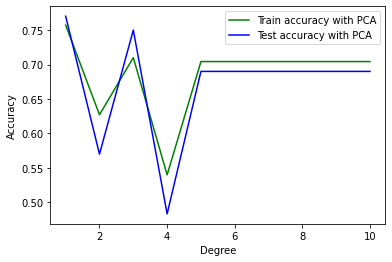

Degree 1 has accuracy = 0.77
Degree 2 has accuracy = 0.57
Degree 3 has accuracy = 0.75
Degree 4 has accuracy = 0.48
Degree 5 has accuracy = 0.69
Degree 6 has accuracy = 0.69
Degree 7 has accuracy = 0.69
Degree 8 has accuracy = 0.69
Degree 9 has accuracy = 0.69
Degree 10 has accuracy = 0.69
Best degree is 1 (accuracy = 0.77)


In [12]:
plt.plot(degrees, pca_train_accuracies, color="green", label="Train accuracy with PCA")
plt.plot(degrees, pca_test_accuracies, color="blue", label="Test accuracy with PCA")
plt.xlabel("Degree")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

for i in range(len(degrees)):
    print(f"Degree {degrees[i]} has accuracy = {pca_test_accuracies[i]:.2f}")

best_degree_index = pca_test_accuracies.index(max(pca_test_accuracies))
best_degree = degrees[best_degree_index]
print(f"Best degree is {best_degree} (accuracy = {pca_test_accuracies[best_degree_index]})")

1. Degree 1 -- no difference between train and test accuracy.
2. Degree 2 -- overfit.
3. Degree 3 -- underfit.
4. Degree 4 -- overfit.
5. Degree 5-10 -- underfit.

In terms of accuracy Degree 1 better than other degrees.

## Training without PCA

In [13]:
# Trying to train with full feature set for 5 degrees.
# Look below for comments why there are only 5 degrees for training.
degrees = list(range(1, 6))
train_accuracies = []
test_accuracies = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x_train)
    print(f"x_poly: (shape = {x_poly.shape})")

    log_regr = LogisticRegression()
    log_regr.fit(x_poly, y_train)

    y_pred = log_regr.predict(poly.fit_transform(x_test))

    test_accuracies.append(accuracy_score(y_test, y_pred))
    train_accuracies.append(accuracy_score(y_train, log_regr.predict(poly.fit_transform(x_train))))

x_poly: (shape = (700, 21))
x_poly: (shape = (700, 231))


C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConv

x_poly: (shape = (700, 1771))
x_poly: (shape = (700, 10626))


C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


x_poly: (shape = (700, 53130))


C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


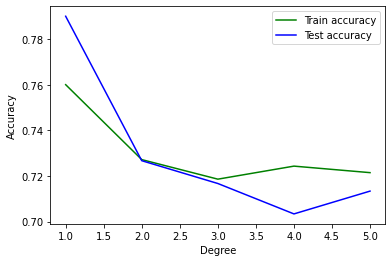

Degree 1 has accuracy = 0.79
Degree 2 has accuracy = 0.73
Degree 3 has accuracy = 0.72
Degree 4 has accuracy = 0.70
Degree 5 has accuracy = 0.71
Best degree is 1 (accuracy = 0.79)


In [14]:
plt.plot(degrees, train_accuracies, color="green", label="Train accuracy")
plt.plot(degrees, test_accuracies, color="blue", label="Test accuracy")
plt.xlabel("Degree")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

for i in range(len(degrees)):
    print(f"Degree {degrees[i]} has accuracy = {test_accuracies[i]:.2f}")

best_degree_index = test_accuracies.index(max(test_accuracies))
best_degree = degrees[best_degree_index]
print(f"Best degree is {best_degree} (accuracy = {test_accuracies[best_degree_index]})")

1. Degree 1 -- underfit.
2. Degree 2 -- no difference between train and test accuracy.
3. Degree 3 -- underfit.
4. Degree 4 -- overfit.
5. Degree 5 -- overfit.

In terms of accuracy Degree 1 better than other degrees.

Training with all features for degrees greater than 5
cannot be done in my laptop due to memory limitations.
Also, I've tried train model with reduced feature set.
Results are the same, best model for degree 1, so
I decided to train model for full feature set for degree 1.

## Tuning hyperparameters using GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV

poly = PolynomialFeatures(degree=best_degree)
x_poly = poly.fit_transform(x_train)
log_regr = LogisticRegression()
log_regr.fit(x_poly, y_train)
print(log_regr.get_params().keys())

# lbfgs does not work with l1 penalty
param_grid = [
    {
        "penalty": ["l1", "l2"],
        "solver": ["liblinear"],
        "C": np.logspace(-4, 4, 20)
    },
    {
        "penalty": ["l2"],
        "solver": ["lbfgs"],
        "C": np.logspace(-4, 4, 20)
    }
]
grid_search_clf = GridSearchCV(log_regr, param_grid)

grid_search_clf.fit(x_train, y_train)
means = grid_search_clf.cv_results_['mean_test_score']
stds = grid_search_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print("\nBest parameters set found on development set:\n")
print(grid_search_clf.best_params_)

C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConv

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\si

0.704 (+/-0.007) for {'C': 0.0001, 'penalty': 'l1', 'solver': 'liblinear'}
0.691 (+/-0.046) for {'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}
0.701 (+/-0.017) for {'C': 0.00026366508987303583, 'penalty': 'l1', 'solver': 'liblinear'}
0.696 (+/-0.054) for {'C': 0.00026366508987303583, 'penalty': 'l2', 'solver': 'liblinear'}
0.700 (+/-0.038) for {'C': 0.0006951927961775605, 'penalty': 'l1', 'solver': 'liblinear'}
0.706 (+/-0.060) for {'C': 0.0006951927961775605, 'penalty': 'l2', 'solver': 'liblinear'}
0.703 (+/-0.041) for {'C': 0.0018329807108324356, 'penalty': 'l1', 'solver': 'liblinear'}
0.714 (+/-0.063) for {'C': 0.0018329807108324356, 'penalty': 'l2', 'solver': 'liblinear'}
0.699 (+/-0.052) for {'C': 0.004832930238571752, 'penalty': 'l1', 'solver': 'liblinear'}
0.726 (+/-0.071) for {'C': 0.004832930238571752, 'penalty': 'l2', 'solver': 'liblinear'}
0.701 (+/-0.054) for {'C': 0.012742749857031334, 'penalty': 'l1', 'solver': 'liblinear'}
0.736 (+/-0.084) for {'C': 0.012742749857

C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [16]:
# Training model with tuned hyper-parameters
poly = PolynomialFeatures(degree=best_degree)
x_poly = poly.fit_transform(x_train)
log_regr = LogisticRegression(**grid_search_clf.best_params_)
log_regr.fit(x_poly, y_train)

C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LogisticRegression(C=29.763514416313132, penalty='l1', solver='liblinear')

## Testing tuned model for males and females

In [17]:
x_male_test, x_female_test, y_male_test, y_female_test = [], [], [], []

# splitting test dataset into male and female test datasets
for i in range(x_test.shape[0]):
    if x_test[i, 8] in (91, 93, 94):
        x_male_test.append(x_test[i])
        y_male_test.append(y_test[i])
    else:
        x_female_test.append(x_test[i])
        y_female_test.append(y_test[i])

# converting native Python lists to np.array so that sklearn can work with them
x_male_test = np.array(x_male_test)
x_female_test = np.array(x_female_test)
y_male_test = np.array(y_male_test)
y_female_test = np.array(y_female_test)

y_male_pred = log_regr.predict(poly.fit_transform(x_male_test))
y_female_pred = log_regr.predict(poly.fit_transform(x_female_test))

male_accuracy = accuracy_score(y_male_test, y_male_pred)
female_accuracy = accuracy_score(y_female_test, y_female_pred)

print(f"male_accuracy: {male_accuracy:.2f}")
print(f"female_accuracy: {female_accuracy:.2f}")

male_accuracy: 0.79
female_accuracy: 0.71


In [18]:
# counting rows for males and females

from collections import Counter

counter = Counter()

for i in range(data.shape[0]):
    if data[i, 8] in (91, 93, 94):
        counter["male"] += 1
    else:
        counter["female"] += 1

print("male count:", counter["male"])
print("female count:", counter["female"])

male count: 690
female count: 310


Prediction for males more accurate because number of males in dataset is higher.